In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import seaborn as sns
# 改变 matplotlib 的后端设置
sns.set()

In [2]:
# parse_dates: try parsing columns ['date'] each as a separate date column.
prices = pd.read_csv("nyse/prices.csv", parse_dates=['date'])
# set_index(): Set the DataFrame index using existing columns.
stocks = prices[prices['symbol'] == 'GE'].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GE,15.220000,15.45,15.15,15.640000,67079900.0
2010-01-05,GE,15.460000,15.53,15.45,15.670000,64550600.0
2010-01-06,GE,15.530000,15.45,15.44,15.620000,55464900.0
2010-01-07,GE,15.480000,16.25,15.43,16.480000,185472300.0
2010-01-08,GE,16.309999,16.60,16.27,16.690001,115112600.0


In [3]:
stocks.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,23.146362,23.151731,22.961163,23.332066,4.855166e+07
std,4.872662,4.884632,4.882610,4.884163,3.067293e+07
min,13.990000,13.880000,13.750000,14.260000,1.316150e+07
25%,19.002500,19.020000,18.862501,19.165000,3.075432e+07
50%,23.595000,23.605001,23.445001,23.760000,4.044950e+07
75%,26.765000,26.770000,26.600000,26.935001,5.727508e+07
max,32.959999,32.930000,32.740002,33.000000,4.313326e+08


# 1. Plot with Pandas
使用 matlotlib 的 plot 需要先将 DataFrame/Series 转化成 ndarray.
不如直接使用 pandas.DataFrame/Series.plot() 函数，其实它的底层调用了 matlotlib.
1. [`pd.DataFrame.plot()`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)
2. [`pandas.plotting`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-tools)

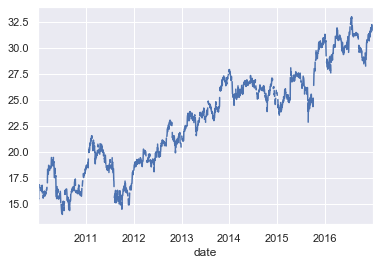

In [4]:
# 重新采样,是对原样本重新处理的一个方法,是一个对常规时间序列数据重新采样和频率转换的便捷的方法。
# resample(): Resample time-series data.
# 'D': Freq=每1天
stocks['open'].resample('D').mean().plot()

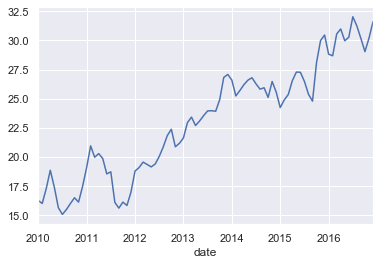

In [5]:
# 'M': Freq=每1月
stocks['open'].resample('M').mean().plot()

<class 'pandas.core.series.Series'>


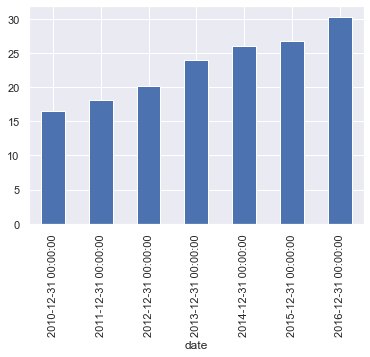

In [6]:
# 'Y': Freq=每1年
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.plot.html#pandas.Series.plot
# # pandas.Series.plot
stocks['open'].resample('Y').mean().plot(kind='bar')

C:\Anaconda3\envs\python3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Anaconda3\envs\python3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


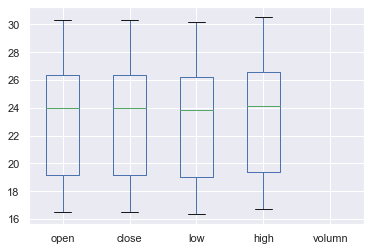

In [8]:
# pandas.Series.plot(kind= box/hist/box/...
stocks.reindex(columns=['open','close','low','high','volumn']).resample('Y').mean().plot(kind='box') 

<class 'pandas.core.series.Series'>


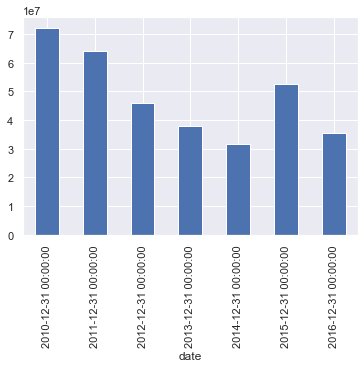

In [9]:
# seaborn 风格
sns.set()
ds = stocks['volume'].resample('Y').mean()
print(type(ds))
ds.plot.bar()

## [`pandas.plotting`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-tools)
[python时间序列画图plot总结](https://www.cnblogs.com/cvtoEyes/p/9563973.html)
- [lag_plot()](https://pandas.pydata.org/pandas-docs/version/0.23.4/visualization.html?highlight=autocorrelation_plot) 显示数据集是否是随机的
    - Lag plots are used to check if a data set or time series is random.
    - 给数据一段时间的观测间隔，因为假定前面的数据和后面的数据有关系，是正相关或是负相关还是什么。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


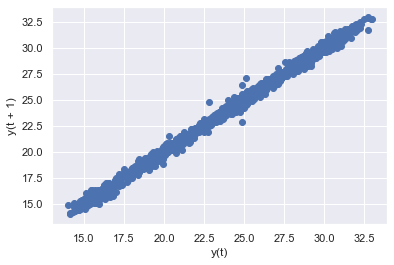

In [10]:
from pandas.plotting import lag_plot
# y(t+1) 与 y(t) 为近似线性关系
lag_plot(stocks['open'], lag=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


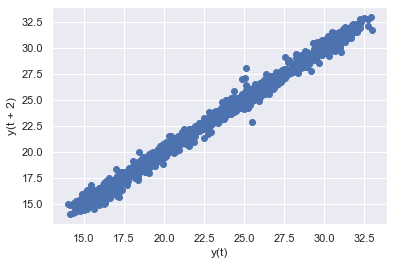

In [11]:
# y(t+2) 与 y(t) 为近似线性关系
lag_plot(stocks['open'], lag=2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


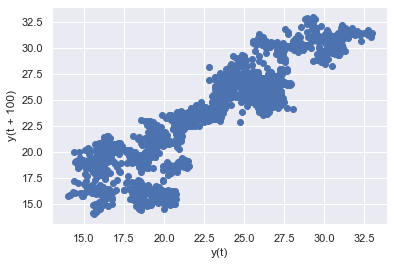

In [12]:
# y(t+100) 与 y(t) 的线性关系不显著
lag_plot(stocks['open'], lag=100)

- [autocorrelation_plot()](https://pandas.pydata.org/pandas-docs/version/0.23.4/visualization.html?highlight=autocorrelation_plot) 
    - Autocorrelation plots are often used for checking randomness in time series. 
    - This is done by computing autocorrelations for data values at varying time lags. 
    - If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 
    - If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 
    - The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. 
    - The dashed line is 99% confidence band.
    - [autocorrelation plots - wikipadia](https://en.wikipedia.org/wiki/Correlogram)
    - 考虑数据和一定间隔数据的相关性，越接近1是正相关，接近-1是负相关，接近0就是相关性很低。
    - 默认是数据和滞后1步的相关性。

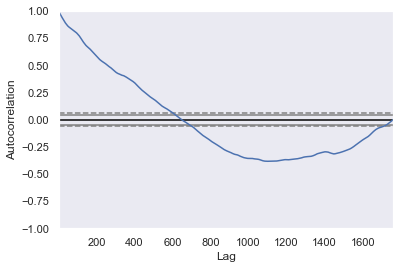

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stocks['open']) 

## scatter_matrix
- [矩阵散点图](https://blog.csdn.net/grape875499765/article/details/78781992/)
- [pandas.plotting.scatter_matrix()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
- [scatter plot matrix - visualization](https://pandas.pydata.org/pandas-docs/version/0.23.4/visualization.html?highlight=scatter_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DC9CFCE128>,
      dtype=object)

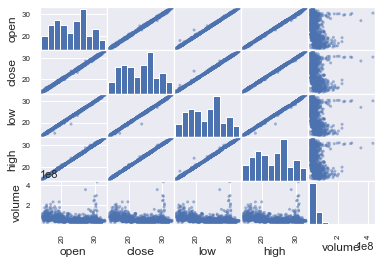

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(stocks)

In [24]:
prices['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [15]:
# 公司信息
securities = pd.read_csv('nyse/securities.csv')
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [16]:
# 公司年报
fundamentals = pd.read_csv('nyse/fundamentals.csv')
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [18]:
fundamentals.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DC9E8903C8>]],
      dtype=object)

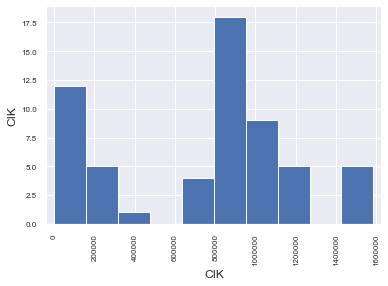

In [19]:
# 健康医疗板块的公司信息
health_care = securities[securities['GICS Sector']=='Health Care']
# 只统计数值信息：列 'CIK'
scatter_matrix(health_care)

In [39]:
# 表合并：健康医疗板块的公司信息+年报信息
health_fund_merge = pd.merge(health_care, fundamentals, left_on='Ticker symbol', right_on='Ticker Symbol')

In [40]:
# 因为列名不一致，合并后的表有2列股票信息 'Ticker symbol' 'Ticker Symbol'
health_fund_merge.head(n=5)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Unnamed: 0,Ticker Symbol,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,20,ABT,...,3.132300e+10,1.328000e+10,2.672100e+10,4.051400e+10,6.723500e+10,1.905000e+10,-5.591000e+09,2012.0,3.76,1.585904e+09
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,21,ABT,...,1.924700e+10,9.507000e+09,2.517100e+10,1.778200e+10,4.295300e+10,1.965700e+10,-6.844000e+09,2013.0,1.64,1.570732e+09
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,22,ABT,...,1.355600e+10,1.046700e+10,2.152600e+10,1.968100e+10,4.120700e+10,2.024700e+10,-8.678000e+09,2014.0,1.50,1.522667e+09
3,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,23,ABT,...,1.415500e+10,9.186000e+09,2.121100e+10,2.003600e+10,4.124700e+10,2.040500e+10,-1.062200e+10,2015.0,2.94,1.504422e+09
4,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,12,ABBV,...,1.535400e+10,6.776000e+09,-3.500000e+08,2.735800e+10,2.700800e+10,1.838000e+10,0.000000e+00,NaN,NaN,NaN


In [42]:
# 删除两列信息 ['Unnamed: 0','Ticker Symbol']
set1 = set(health_fund_merge.columns)
health_fund = health_fund_merge.drop(['Unnamed: 0','Ticker Symbol'], axis=1)
set2 = set(health_fund.columns)
# 打印差集
print('\n',set1-set2)
health_fund.head()


 {'Ticker Symbol', 'Unnamed: 0'}


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Period Ending,Accounts Payable,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,2012-12-31,1.088900e+10,...,3.132300e+10,1.328000e+10,2.672100e+10,4.051400e+10,6.723500e+10,1.905000e+10,-5.591000e+09,2012.0,3.76,1.585904e+09
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,2013-12-31,5.948000e+09,...,1.924700e+10,9.507000e+09,2.517100e+10,1.778200e+10,4.295300e+10,1.965700e+10,-6.844000e+09,2013.0,1.64,1.570732e+09
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,2014-12-31,5.350000e+09,...,1.355600e+10,1.046700e+10,2.152600e+10,1.968100e+10,4.120700e+10,2.024700e+10,-8.678000e+09,2014.0,1.50,1.522667e+09
3,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,2015-12-31,5.683000e+09,...,1.415500e+10,9.186000e+09,2.121100e+10,2.003600e+10,4.124700e+10,2.040500e+10,-1.062200e+10,2015.0,2.94,1.504422e+09
4,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2012-12-31,5.734000e+09,...,1.535400e+10,6.776000e+09,-3.500000e+08,2.735800e+10,2.700800e+10,1.838000e+10,0.000000e+00,NaN,NaN,NaN


['Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Total Equity', 'Total Liabilities', 'Total Liabilities & Equity', 'Total Revenue']


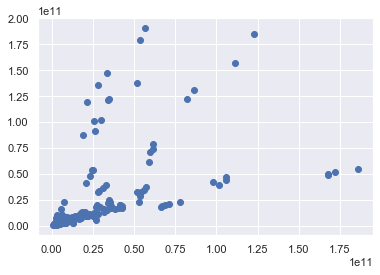

In [23]:
# 列名中包含 'Total' 的列
target_column = [c for c in health_fund.columns if 'Total' in c]
# 总资产，总流动资产，总流动负债，总资产净值，总负债，总负债&净值，总收入
print(target_column)
# 绘制散点图：x=总资产 y=总收入
# 3条线可能分别是：轻资产，中资产，重资产公司
plt.scatter(health_fund['Total Assets'], health_fund['Total Revenue'])

## [seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)
```
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes 
such that each variable in data will by shared
in the y-axis across a single row 
and in the x-axis across a single column. 
The diagonal Axes are treated differently, drawing a plot to show 
the univariate distribution of the data for the variable in that column.

    It is also possible to show a subset of variables 
or plot different variables on the rows and columns.

    This is a high-level interface for PairGrid that is intended 
to make it easy to draw a few common styles. 
You should use PairGrid directly if you need more flexibility.
```
- [seaborn.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

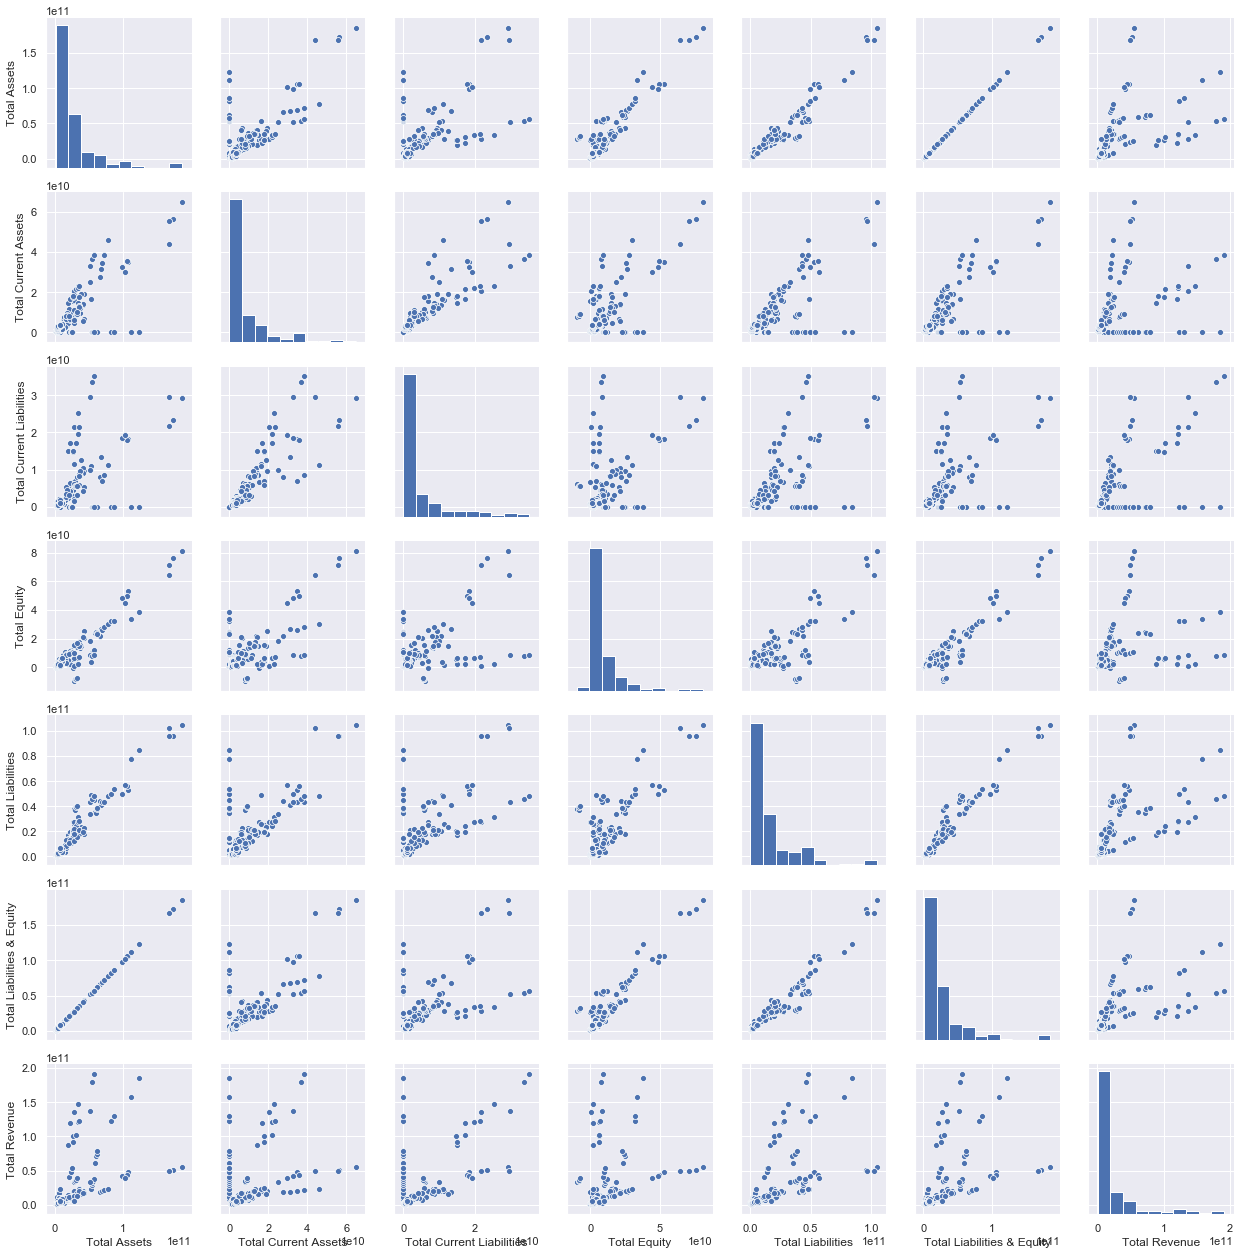

In [24]:
# 又是那个矩阵散点图，展示各变量之间的相关性
    # 1)'Total Liabilities & Equity' 与 'Total Assets' 显著的线性关系
    # 2) 3条线的相关性可能分别是：轻资产，中资产，重资产公司
    # 3) 对角线表示：巨头垄断市场，其他公司很小
# pandas.plotting.scatter_matrix(dataFrame)
# seaborn.pairplot(dataFrame)
sns.pairplot(health_fund[target_column])

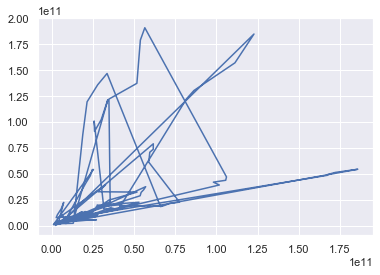

In [25]:
# 折线图：x=总资产 y=总收入
# 3条线可能分别是：轻资产，中资产，重资产公司
plt.plot(health_fund['Total Assets'], health_fund['Total Revenue'])

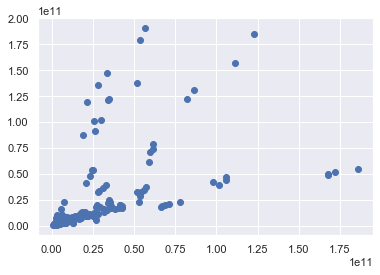

In [43]:
# 3条线可能分别是：轻资产，中资产，重资产公司
plt.scatter(health_fund['Total Assets'], health_fund['Total Revenue'])

In [29]:
# 统计健康医疗板块每家公司的年报均值
health_sum = health_fund.groupby('Ticker symbol')[target_column].mean()
health_sum.head(n=5)

,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue
Ticker symbol,,,,,,,
ABBV,3.419225e+10,1.639925e+10,8.985500e+09,2.457250e+09,3.173500e+10,3.419225e+10,1.999725e+10
ABC,2.551750e+10,1.859505e+10,1.974508e+10,1.755608e+09,2.376189e+10,2.551750e+10,1.225849e+11
ABT,4.816050e+10,1.957025e+10,1.061000e+10,2.365725e+10,2.450325e+10,4.816050e+10,1.983975e+10
ALXN,8.467414e+09,2.494222e+09,6.802922e+08,5.659274e+09,2.808140e+09,8.467414e+09,2.368336e+09
AMGN,7.105225e+10,3.665125e+10,8.705750e+09,2.645800e+10,4.459425e+10,7.105225e+10,2.084800e+10


<class 'numpy.ndarray'>
[0.         0.8975979  1.7951958  2.6927937  3.5903916  4.48798951
 5.38558741 0.        ]
<class 'numpy.ndarray'>
(49, 7)
(49, 1)
(49, 8)


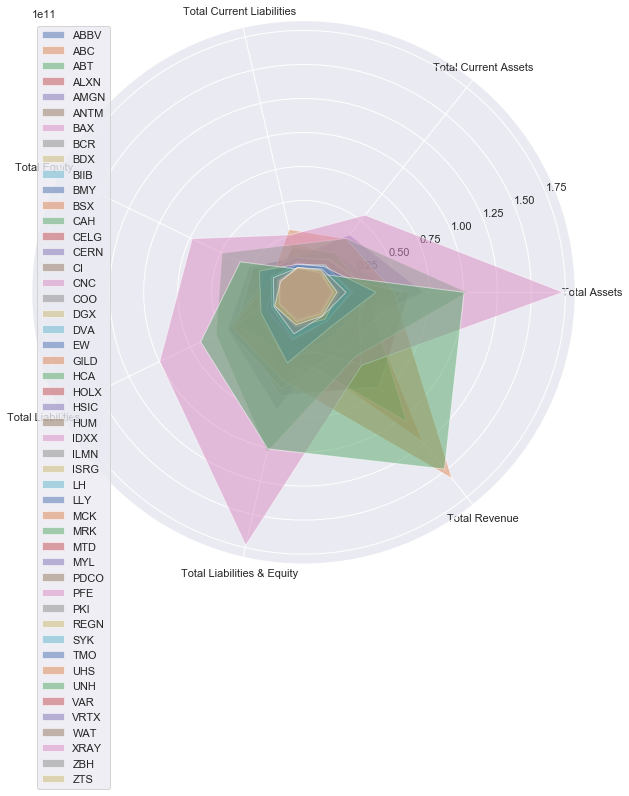

In [72]:
# 绘制极坐标图：健康医疗板块每家公司的年报均值
fig=plt.figure(figsize=(20,10))
# 111: 共1行1列在第1个
ax=fig.add_subplot(111, polar=True) #polar参数

# 周向坐标：按列计算轴向线角度[0,2Pi]
angles=np.linspace(0,2*np.pi, len(target_column),endpoint=False)
# 加 1 列，与起点闭合
angles_extended = np.concatenate([angles, [angles[0]]])
print(type(angles_extended))
print(angles_extended)

# 径向坐标：取数值转化成 ndarray
health_sum_array = health_sum.values
print(type(health_sum_array))
# 49行1列
print(health_sum_array.shape)
# 取出第1列 => 49行1 列
print(health_sum_array[:, 0].reshape((-1, 1)).shape)
# 7+1 列拼接 => 8列
health_sum_array = np.concatenate([health_sum_array, health_sum_array[:, 0].reshape((-1, 1))], axis=1)
print(health_sum_array.shape)

# 过滤小值
selected_indicator = (health_sum_array < 0.25E11).all(axis=1).tolist()
selected_rows = [health_sum_array[i].reshape(1,-1) for i,select in enumerate(selected_indicator) if select is True]
select_health_sum_array = np.concatenate(selected_rows, axis=0)

# 绘图：x=周向坐标，y=径向坐标，alpha=透明度
# 将数据在极坐标图上绘制多边形 => 8行49列 => 8个顶点49个多边形
ax.fill(angles_extended, health_sum_array.T, alpha=0.5)
# 过滤小值
# ax.fill(angles_extended, select_health_sum_array.T, alpha=0.5)

# 周向刻度和标签：周向坐标和列名
ax.set_xticklabels(target_column)
ax.set_xticks(angles)
# 系列名称：公司股票名称
ax.legend(health_sum.index)
plt.show()

In [68]:
# 过滤小值
selected_indicator = (health_sum_array < 0.25E11).all(axis=1).tolist()
selected_rows = [health_sum_array[i].reshape(1,-1) for i,select in enumerate(selected_indicator) if select is True]
select_health_sum_array = np.concatenate(selected_rows, axis=0)
select_health_sum_array

array([[8.46741450e+09, 2.49422150e+09, 6.80292250e+08, 5.65927425e+09,
        2.80814025e+09, 8.46741450e+09, 2.36833650e+09, 8.46741450e+09],
       [2.31817500e+10, 1.03532500e+10, 5.44850000e+09, 8.09175000e+09,
        1.50900000e+10, 2.31817500e+10, 1.10090000e+10, 2.31817500e+10],
       [5.07095000e+09, 2.10580000e+09, 8.92675000e+08, 1.75587500e+09,
        3.31507500e+09, 5.07095000e+09, 3.37577500e+09, 5.07095000e+09],
       [1.91650000e+10, 6.00750000e+09, 3.28650000e+09, 6.22325000e+09,
        1.29420000e+10, 1.91652500e+10, 9.81625000e+09, 1.91650000e+10],
       [1.71399088e+10, 5.78810850e+09, 2.49349475e+09, 1.02355355e+10,
        6.90437325e+09, 1.71399088e+10, 9.71202500e+09, 1.71399088e+10],
       [1.72205000e+10, 3.27750000e+09, 2.21800000e+09, 6.54650000e+09,
        1.06740000e+10, 1.72205000e+10, 7.31225000e+09, 1.72205000e+10],
       [2.14420750e+10, 9.38287500e+09, 2.24645000e+09, 6.15825000e+09,
        1.52838250e+10, 2.14420750e+10, 8.66237500e+09, 2.

In [75]:
health_fund.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK', 'Period Ending', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cas

In [54]:
# 固定资产，总资产
health_fund[['Fixed Assets', 'Total Assets']]

,Fixed Assets,Total Assets
0,8.063000e+09,6.723500e+10
1,5.971000e+09,4.295300e+10
2,7.869000e+09,4.120700e+10
3,5.732000e+09,4.124700e+10
4,2.247000e+09,2.700800e+10
...,...,...
189,2.062600e+09,2.721950e+10
190,1.295000e+09,6.558000e+09
191,1.318000e+09,6.588000e+09
192,1.307000e+09,7.913000e+09


In [55]:
# 健康医疗板块每家公司的固定资产均值
fa = health_fund.groupby('Ticker symbol')['Fixed Assets'].mean()
# 健康医疗板块每家公司的总资产均值
ta = health_fund.groupby('Ticker symbol')['Total Assets'].mean()

In [59]:
print(fa.shape)
fa.head()

(49,)


Ticker symbol
ABBV    2.398750e+09
ABC     1.106584e+09
ABT     6.908750e+09
ALXN    5.815892e+08
AMGN    5.110000e+09
Name: Fixed Assets, dtype: float64

In [60]:
print(ta.shape)
ta.head()

(49,)


Ticker symbol
ABBV    3.419225e+10
ABC     2.551750e+10
ABT     4.816050e+10
ALXN    8.467414e+09
AMGN    7.105225e+10
Name: Total Assets, dtype: float64

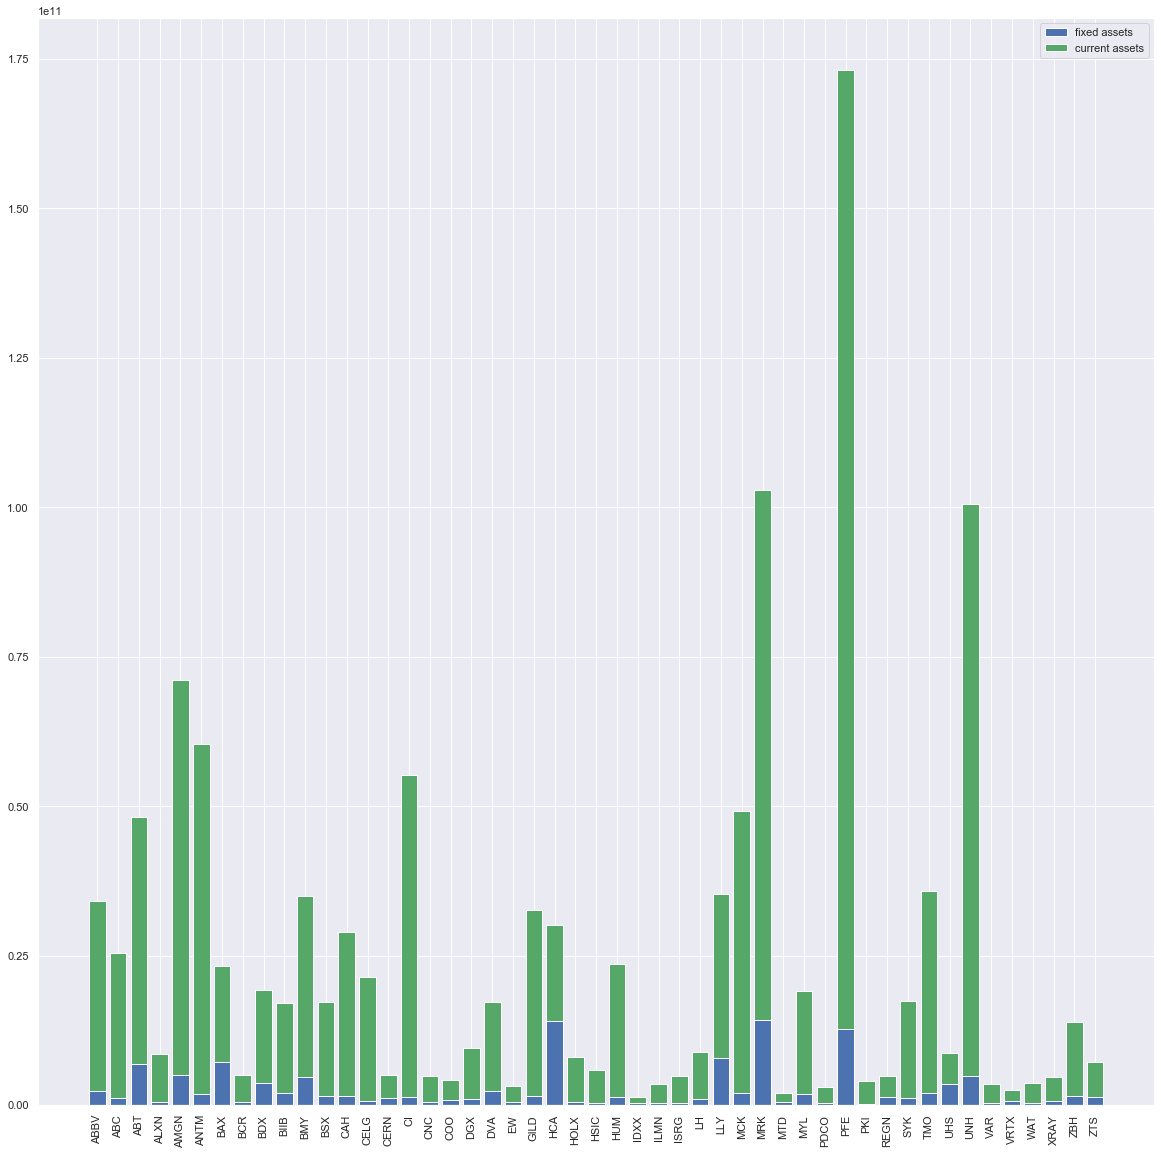

In [62]:
fig = plt.figure(figsize=(20, 20))
# 每家公司的固定资产
plt.bar(np.arange(len(fa)), fa, color='b')
# 每家公司的流动资产
plt.bar(np.arange(len(fa)), ta-fa, bottom=fa, color='g')
# 横坐标：位置，标签，标签旋转
plt.xticks(range(len(ta)), ta.index, rotation=90)
# 系列名称
plt.legend(['fixed assets', 'current assets'])